In [67]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import defaultdict


In [4]:
expCommonLocs = '/media/ak/LaCie/ExperimentCommonLocs'
symbolsPath = '/media/ak/LaCie/ExperimentCommonLocs/LabelsAlternateTwo'

In [7]:
symbols = sorted(os.listdir(symbolsPath))

In [72]:
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))

In [60]:
symbolIdx =2
symbolIdxPath = os.path.join(symbolsPath, symbols[symbolIdx])
files = os.listdir(symbolIdxPath)
statistic_for_testing = defaultdict(dict)
for testFile, _ in enumerate(files):
    filePath = os.path.join(symbolIdxPath, files[testFile])
    rawdf = pd.read_csv(filePath)[['TradedTime','TradedPrice', 'ReturnTradedPrice', 'Volume','Duration']]
    # Step 1: Calculate the Pearson correlation coefficient
    correlation, p_value = stats.pearsonr(rawdf['ReturnTradedPrice'], rawdf['Duration'])
    statistic_for_testing['correlation'][testFile] = correlation
    statistic_for_testing['p_value'][testFile] = p_value
    
correlation = pd.DataFrame.from_dict(statistic_for_testing['correlation'].values()).median()
p_value = pd.DataFrame.from_dict(statistic_for_testing['p_value'].values()).median()
# Step 1: Calculate the Pearson correlation coefficient
correlation, p_value = stats.pearsonr(rawdf['ReturnTradedPrice'], rawdf['Duration'])

print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


Correlation Coefficient: -0.024059824853457652
P-value: 0.3429042719758418


Correlation Coefficient: -0.024059824853457652
P-value: 0.3429042719758418


Fail to reject the null hypothesis - There is no significant linear relationship.


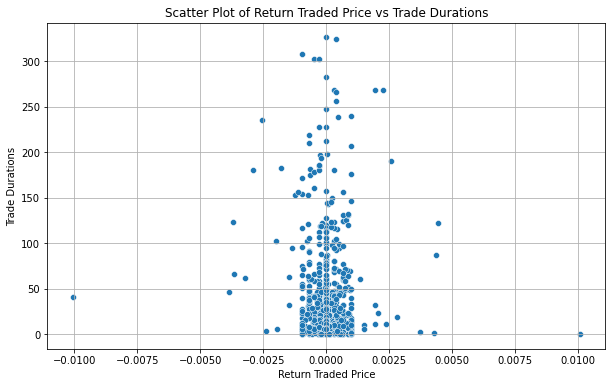

                            OLS Regression Results                            
Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9001
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.343
Time:                        14:04:28   Log-Likelihood:                 9302.7
No. Observations:                1556   AIC:                        -1.860e+04
Df Residuals:                    1554   BIC:                        -1.859e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.688e-06    1.7e-05      0.394      0.6

In [59]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis - There is no significant linear relationship.")

# Step 3: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ReturnTradedPrice', y='Duration', data=rawdf)
plt.title('Scatter Plot of Return Traded Price vs Trade Durations')
plt.xlabel('Return Traded Price')
plt.ylabel('Trade Durations')
plt.grid(True)
plt.show()

# Additional Analysis: Linear Regression
X = sm.add_constant(rawdf['Duration'])  # Adding a constant for the intercept term
model = sm.OLS(rawdf['ReturnTradedPrice'], X).fit()
print(model.summary())


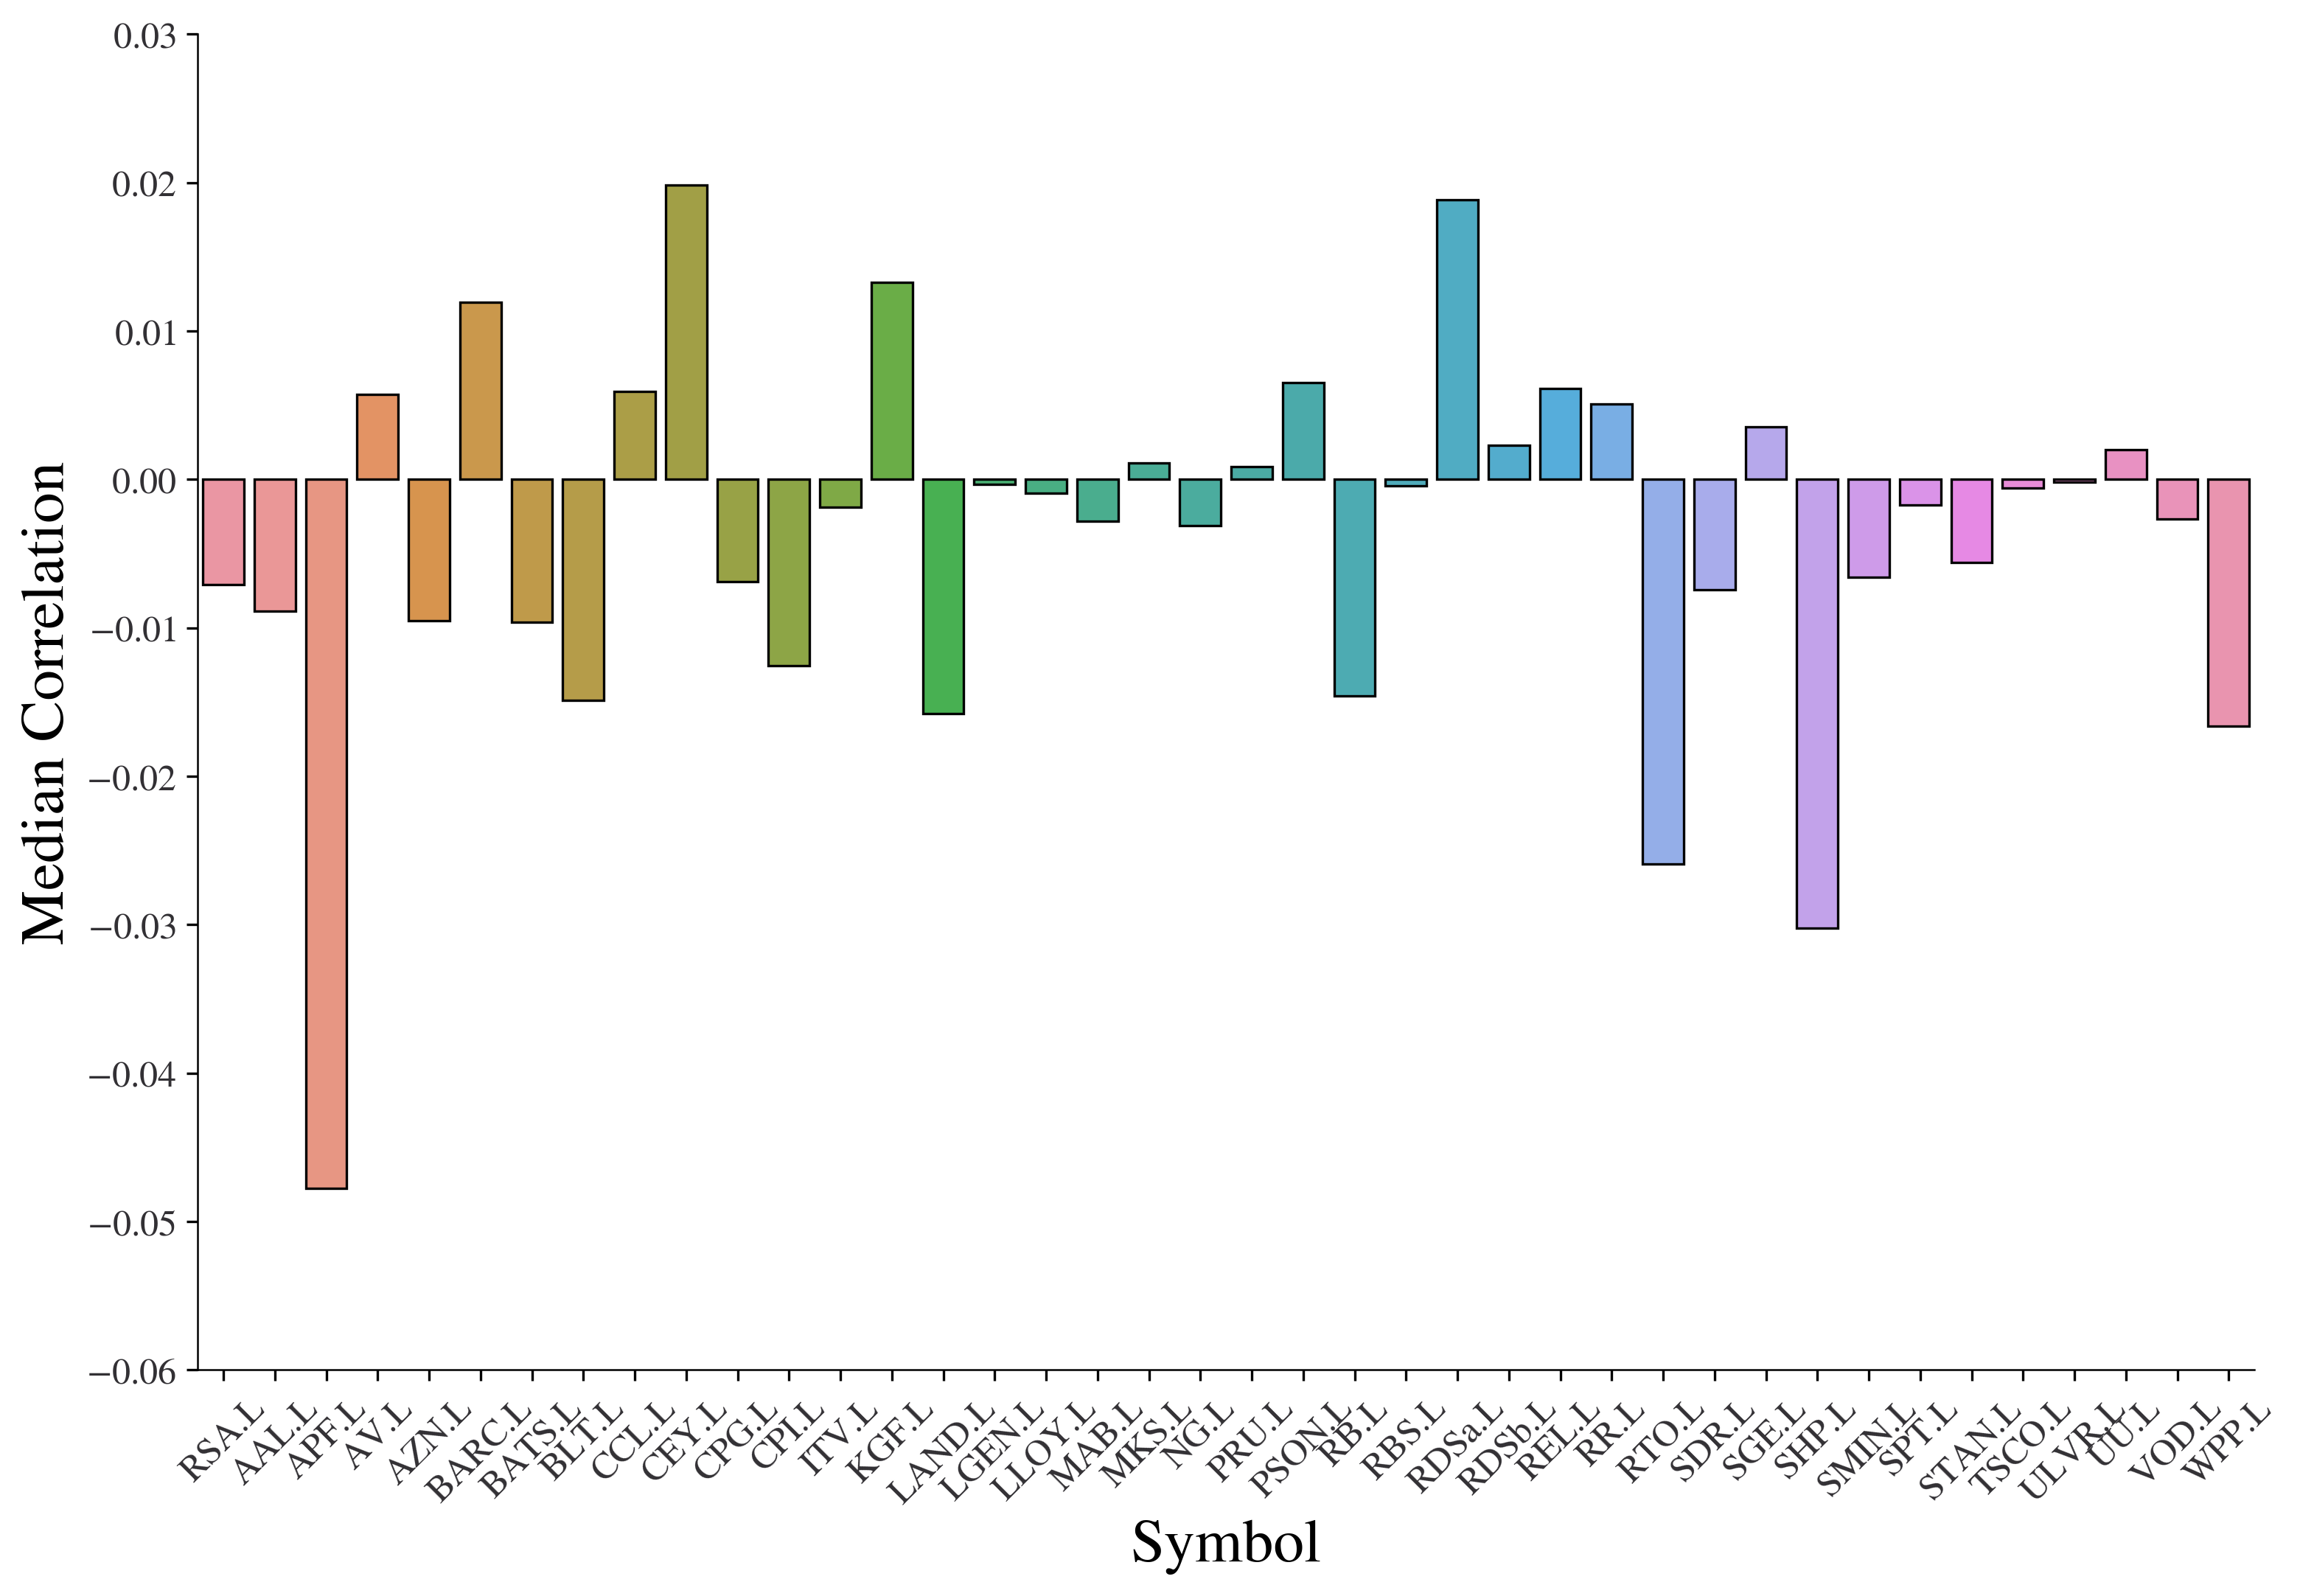

Overall Median Correlation Coefficient: -0.0018013214601835322
Overall Median P-value: 0.03829082390873444
Fail to reject the null hypothesis - There is no significant linear relationship across all symbols.


In [76]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import defaultdict

# Assuming symbolsPath is defined and contains all symbolIdx directories
symbols = [d for d in os.listdir(symbolsPath) if os.path.isdir(os.path.join(symbolsPath, d))]

# Dictionary to hold statistics for each symbolIdx
all_statistics = defaultdict(lambda: defaultdict(list))

for symbol in symbols:
    symbolIdxPath = os.path.join(symbolsPath, symbol)
    files = os.listdir(symbolIdxPath)
    
    for file in files:
        filePath = os.path.join(symbolIdxPath, file)
        rawdf = pd.read_csv(filePath)[['ReturnTradedPrice', 'Duration']]
        
        # Calculate the Pearson correlation coefficient for each file
        correlation, p_value = stats.pearsonr(rawdf['ReturnTradedPrice'], rawdf['Duration'])
        all_statistics[symbol]['correlation'].append(correlation)
        all_statistics[symbol]['p_value'].append(p_value)

# Dataframe for median correlations and p-values for visualization and hypothesis testing
median_correlations = {symbol: np.median(stats['correlation']) for symbol, stats in all_statistics.items()}
median_p_values = {symbol: np.median(stats['p_value']) for symbol, stats in all_statistics.items()}

# Convert dictionaries to DataFrame
df_correlations = pd.DataFrame(list(median_correlations.items()), columns=['Symbol', 'Median Correlation'])
df_p_values = pd.DataFrame(list(median_p_values.items()), columns=['Symbol', 'Median P-Value'])

# Plotting median correlation values
plt.figure(figsize=(12, 8))
sns.barplot(x='Symbol', y='Median Correlation', data=df_correlations)
# plt.title('Median Correlation of Return Traded Price vs Duration across Symbols')
plt.xlabel('Symbol', size=20)
plt.ylabel('Median Correlation', size=20)
plt.xticks(rotation=45)
plt_title = 'median_correlation_hypothesis_testing'
plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(plt_title) + '.png', dpi=300)
plt.show()

# Hypothesis Testing on the overall median correlation
overall_median_correlation = np.median(list(median_correlations.values()))
overall_median_p_value = np.median(list(median_p_values.values()))

print(f"Overall Median Correlation Coefficient: {overall_median_correlation}")
print(f"Overall Median P-value: {overall_median_p_value}")

alpha = 0.01  # Significance level
if overall_median_p_value < alpha:
    print("Reject the null hypothesis - There is a significant linear relationship across all symbols.")
else:
    print("Fail to reject the null hypothesis - There is no significant linear relationship across all symbols.")


In [66]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Assuming symbolsPath is defined and contains all symbolIdx directories
symbols = [d for d in os.listdir(symbolsPath) if os.path.isdir(os.path.join(symbolsPath, d))]

# Dictionary to hold statistics for each symbolIdx
all_statistics = defaultdict(lambda: defaultdict(list))

for symbol in symbols:
    symbolIdxPath = os.path.join(symbolsPath, symbol)
    files = os.listdir(symbolIdxPath)
    
    for file in files:
        filePath = os.path.join(symbolIdxPath, file)
        rawdf = pd.read_csv(filePath)[['ReturnTradedPrice', 'Duration']]
        
        # Calculate the Pearson correlation coefficient for each file
        correlation, p_value = stats.pearsonr(rawdf['ReturnTradedPrice'], rawdf['Duration'])
        all_statistics[symbol]['correlation'].append(correlation)
        all_statistics[symbol]['p_value'].append(p_value)

# Prepare a DataFrame for results
results = []

for symbol, stats in all_statistics.items():
    median_correlation = np.median(stats['correlation'])
    median_p_value = np.median(stats['p_value'])
    reject_null = "Reject H0" if median_p_value < 0.001 else "Fail to Reject H0"
    results.append({
        'Symbol': symbol,
        'Median Correlation': np.round(median_correlation,2),
        'Median P-Value': np.round(median_p_value,2),
        'Hypothesis Test Result': reject_null
    })

# Convert list to DataFrame
results_df = pd.DataFrame(results)

# Display the results in a nicely formatted table
print(results_df.to_string(index=False))


 Symbol  Median Correlation  Median P-Value Hypothesis Test Result
  RSA.L               -0.01            0.18      Fail to Reject H0
  AAL.L               -0.01            0.05      Fail to Reject H0
  APF.L               -0.05            0.52      Fail to Reject H0
   AV.L                0.01            0.11      Fail to Reject H0
  AZN.L               -0.01            0.02      Fail to Reject H0
 BARC.L                0.01            0.00      Fail to Reject H0
 BATS.L               -0.01            0.00              Reject H0
  BLT.L               -0.01            0.00              Reject H0
  CCL.L                0.01            0.10      Fail to Reject H0
  CEY.L                0.02            0.03      Fail to Reject H0
  CPG.L               -0.01            0.12      Fail to Reject H0
  CPI.L               -0.01            0.06      Fail to Reject H0
  ITV.L               -0.00            0.05      Fail to Reject H0
  KGF.L                0.01            0.04      Fail to Rejec

In [77]:
# Convert DataFrame to LaTeX
latex_table = results_df.to_latex(index=False, header=True, column_format='lr')

# Customizing the LaTeX table output
latex_table_custom = latex_table.replace("\\toprule", "\\hline\\hline").replace("\\midrule", "\\hline").replace("\\bottomrule", "\\hline\\hline")

latex_output = f"""
\\begin{{table}}[h]
\\centering
{latex_table_custom}
\\caption{{Summary of data for all 40 symbols for all trading days of 2017. Duration is the difference between the calendar time of sequential trades. The table summarizes key trading statistics, such as the duration in milliseconds, the standard deviation of logarithmic return, the number of trades per day, and number of traded shares.}}
\\label{{table:short_data_descr}}
\\end{{table}}
"""

print(latex_output)



\begin{table}[h]
\centering
\begin{tabular}{lr}
\hline\hline
 Symbol &  Median Correlation &  Median P-Value & Hypothesis Test Result \\
\hline
  RSA.L &               -0.01 &            0.18 &      Fail to Reject H0 \\
  AAL.L &               -0.01 &            0.05 &      Fail to Reject H0 \\
  APF.L &               -0.05 &            0.52 &      Fail to Reject H0 \\
   AV.L &                0.01 &            0.11 &      Fail to Reject H0 \\
  AZN.L &               -0.01 &            0.02 &      Fail to Reject H0 \\
 BARC.L &                0.01 &            0.00 &      Fail to Reject H0 \\
 BATS.L &               -0.01 &            0.00 &              Reject H0 \\
  BLT.L &               -0.01 &            0.00 &              Reject H0 \\
  CCL.L &                0.01 &            0.10 &      Fail to Reject H0 \\
  CEY.L &                0.02 &            0.03 &      Fail to Reject H0 \\
  CPG.L &               -0.01 &            0.12 &      Fail to Reject H0 \\
  CPI.L &          

In [75]:
# Assuming 'results_df' is your DataFrame containing the results

# Filter the DataFrame for cases where the null hypothesis was rejected
rejected_hypotheses = results_df[results_df['Hypothesis Test Result'] == "Reject H0"]

# Count the number of symbols with rejected null hypothesis
number_of_rejections = rejected_hypotheses.shape[0]

print(f"Number of symbols for which the null hypothesis was rejected: {number_of_rejections}")


Number of symbols for which the null hypothesis was rejected: 6


In [64]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import defaultdict

# Assuming symbolsPath is defined and contains all symbolIdx directories
symbols = [d for d in os.listdir(symbolsPath) if os.path.isdir(os.path.join(symbolsPath, d))]

# Dictionary to hold statistics for each symbolIdx
all_statistics = defaultdict(lambda: defaultdict(list))

# Dataframe to accumulate all data for overall median regression
all_data = pd.DataFrame()

for symbol in symbols:
    symbolIdxPath = os.path.join(symbolsPath, symbol)
    files = os.listdir(symbolIdxPath)
    
    for file in files:
        filePath = os.path.join(symbolIdxPath, file)
        rawdf = pd.read_csv(filePath)[['ReturnTradedPrice', 'Duration']]
        
        # Accumulate all data
        all_data = pd.concat([all_data, rawdf])

        # Calculate the Pearson correlation coefficient for each file
        correlation, p_value = stats.pearsonr(rawdf['ReturnTradedPrice'], rawdf['Duration'])
        all_statistics[symbol]['correlation'].append(correlation)
        all_statistics[symbol]['p_value'].append(p_value)

        # Additional Linear Regression per file
        X = sm.add_constant(rawdf['Duration'])
        model = sm.OLS(rawdf['ReturnTradedPrice'], X).fit()
        print(f"Regression Summary for {symbol} file {file}:")
        print(model.summary().as_text().split('\n')[0:3])  # Displaying only the part of the summary with R-squared
        print(f"Parameters:\n{model.params.round(2)}")
        print("\n")

# Overall Linear Regression for all data
X_all = sm.add_constant(all_data['Duration'])
model_all = sm.OLS(all_data['ReturnTradedPrice'], X_all).fit()
print("Overall Regression Summary for Combined Data:")
print(model_all.summary().as_text().split('\n')[0:3])  # Displaying only the part of the summary with R-squared
print(f"Parameters:\n{model_all.params.round(2)}")

# Prepare a DataFrame for results
results = []

for symbol, stats in all_statistics.items():
    median_correlation = np.median(stats['correlation'])
    median_p_value = np.median(stats['p_value'])
    reject_null = "Reject H0" if median_p_value < 0.001 else "Fail to Reject H0"
    results.append({
        'Symbol': symbol,
        'Median Correlation': round(median_correlation, 2),
        'Median P-Value': round(median_p_value, 2),
        'Hypothesis Test Result': reject_null
    })

# Convert list to DataFrame
results_df = pd.DataFrame(results)

# Display the results in a nicely formatted table
print(results_df.to_string(index=False))


Regression Summary for RSA.L file 20170703.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RSA.L file 20170704.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.019']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RSA.L file 20170705.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RSA.L file 20170807.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RSA.L file 20170808.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RSA.L file 20170922.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RSA.L file 20170925.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0

Regression Summary for AAL.L file 20170125.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for AAL.L file 20170126.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for AAL.L file 20170127.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for AAL.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AAL.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const       0.0
Duration   -0

/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/sit

Regression Summary for APF.L file 20170717.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.021']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for APF.L file 20170718.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.007']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for APF.L file 20170719.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for APF.L file 20170825.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for APF.L file 20170829.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for APF.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
/home/ak/anaconda3/envs/tickData/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Regression Summary for AV.L file 20170119.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AV.L file 20170120.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AV.L file 20170123.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.007']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for AV.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AV.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0.0

Regression Summary for AV.L file 20170829.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AV.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for AV.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.01

Regression Summary for AZN.L file 20170116.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AZN.L file 20170117.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for AZN.L file 20170118.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for AZN.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for AZN.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BARC.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.077']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BARC.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.025']
Parameters:
const       0.0
Duration   

Regression Summary for BARC.L file 20170922.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.093']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BARC.L file 20170925.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BARC.L file 20170926.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for BATS.L file 20170814.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BATS.L file 20170815.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BATS.L file 20170816.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for BATS.L file 20170926.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.022']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BATS.L file 20170927.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BATS.L file 20170928.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for BATS.L file 20180404.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BATS.L file 20180405.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.021']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BATS.L file 20180406.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BLT.L file 20170704.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20170705.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.014']
Parameters:
const      -0.0
Duration    0

Regression Summary for BLT.L file 20170808.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20170809.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.022']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20170810.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for BLT.L file 20170918.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20170919.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.013']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20170920.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for BLT.L file 20171025.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BLT.L file 20171026.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for BLT.L file 20171027.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for BLT.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for BLT.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CCL.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CCL.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for CCL.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CCL.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CCL.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CCL.L file 20170906.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CCL.L file 20171009.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CCL.L file 20171010.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.013']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CCL.L file 20171011.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CCL.L file 20180214.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for CCL.L file 20180215.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CCL.L file 20180216.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CEY.L file 20170201.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CEY.L file 20170202.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20170203.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CEY.L file 20170707.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20170710.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.032']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CEY.L file 20170711.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CEY.L file 20170811.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CEY.L file 20170814.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20170815.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CEY.L file 20170918.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20170919.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for CEY.L file 20170920.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CEY.L file 20171020.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CEY.L file 20171023.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20171024.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CEY.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.031']
Parameters:
const      -0.0
Duration    0

Regression Summary for CPG.L file 20170713.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20170714.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for CPG.L file 20170717.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CPG.L file 20170817.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20170818.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for CPG.L file 20170821.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20170925.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20170926.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0

Regression Summary for CPG.L file 20171026.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20171027.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPG.L file 20171030.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CPG.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPG.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for CPG.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for CPI.L file 20170719.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPI.L file 20170720.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for CPI.L file 20170721.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPI.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for CPI.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPI.L file 20171019.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPI.L file 20171020.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.024']
Parameters:
const      -0.0
Duration    0

Regression Summary for CPI.L file 20180405.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.059']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for CPI.L file 20180406.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for CPI.L file 20180409.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for ITV.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ITV.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ITV.L file 20170804.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for ITV.L file 20170918.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for ITV.L file 20170919.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ITV.L file 20170920.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for ITV.L file 20180201.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ITV.L file 20180202.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0

Regression Summary for ITV.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.007']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for ITV.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for KGF.L file 20170116.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for KGF.L file 20170721.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.013']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20170724.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for KGF.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.033']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20170906.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for KGF.L file 20171016.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for KGF.L file 20171017.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for KGF.L file 20171018.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for KGF.L file 20180223.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.007']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20180226.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.007']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for KGF.L file 20180227.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for LAND.L file 20170703.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.014']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LAND.L file 20170704.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LAND.L file 20170705.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LAND.L file 20170814.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LAND.L file 20170815.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LAND.L file 20170816.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LAND.L file 20170926.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LAND.L file 20170927.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LAND.L file 20170928.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LAND.L file 20180205.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LAND.L file 20180206.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.012']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LAND.L file 20180207.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LAND.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LAND.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LAND.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20170718.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20170719.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   

Regression Summary for LGEN.L file 20170823.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20170824.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20170825.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LGEN.L file 20170929.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LGEN.L file 20171002.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20171003.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LGEN.L file 20180207.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LGEN.L file 20180208.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20180209.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LGEN.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for LGEN.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LLOY.L file 20170721.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LLOY.L file 20170724.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LLOY.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LLOY.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LLOY.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   

Regression Summary for LLOY.L file 20171005.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LLOY.L file 20171006.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LLOY.L file 20171009.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for LLOY.L file 20180207.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for LLOY.L file 20180208.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for LLOY.L file 20180209.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for MAB.L file 20170120.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20170123.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MAB.L file 20170124.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MAB.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0

Regression Summary for MAB.L file 20171005.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20171006.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MAB.L file 20171009.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for MAB.L file 20180208.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.025']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MAB.L file 20180209.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for MAB.L file 20180212.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for MKS.L file 20170127.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MKS.L file 20170130.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0

Regression Summary for MKS.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MKS.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MKS.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for MKS.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MKS.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for MKS.L file 20170906.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for MKS.L file 20180215.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for MKS.L file 20180216.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for MKS.L file 20180219.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for NG.L file 20170124.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for NG.L file 20170125.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for NG.L file 20170126.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for NG.L file 20170804.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for NG.L file 20170807.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for NG.L file 20170808.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for NG.L file 20180209.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for NG.L file 20180212.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for NG.L file 20180213.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for PRU.L file 20170117.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PRU.L file 20170118.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for PRU.L file 20170119.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for PRU.L file 20170724.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for PRU.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.134']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PRU.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for PRU.L file 20180201.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PRU.L file 20180202.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0

Regression Summary for PRU.L file 20180410.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PRU.L file 20180411.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.013']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PRU.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PSON.L file 20170707.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for PSON.L file 20170710.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for PSON.L file 20170811.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PSON.L file 20170814.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   

Regression Summary for PSON.L file 20180216.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.031']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for PSON.L file 20180219.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for PSON.L file 20180220.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for RB.L file 20170117.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20170118.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for RB.L file 20170119.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.01

Regression Summary for RB.L file 20170724.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RB.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for RB.L file 20170825.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.034']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20170829.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.02

Regression Summary for RB.L file 20180202.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20180205.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20180206.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for RB.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RB.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.043']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RB.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.035']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RBS.L file 20170711.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20170712.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.012']
Parameters:
const      -0.0
Duration    0

Regression Summary for RBS.L file 20170811.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20170814.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20170815.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RBS.L file 20171215.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20171218.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RBS.L file 20171219.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RBS.L file 20180222.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20180223.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RBS.L file 20180226.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RDSa.L file 20170123.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20170124.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20170125.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const      -0.0
Duration   

Regression Summary for RDSa.L file 20170829.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for RDSa.L file 20171201.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20171204.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20171205.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for RDSa.L file 20180207.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSa.L file 20180208.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20180209.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for RDSa.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSa.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20170713.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSb.L file 20170714.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.043']
Parameters:
const      -0.0
Duration   

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.012']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RDSb.L file 20170818.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20170821.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.022']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20170927.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20170928.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   

Regression Summary for RDSb.L file 20180409.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20180410.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RDSb.L file 20180411.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for REL.L file 20170712.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for REL.L file 20170713.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0

Regression Summary for REL.L file 20170816.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for REL.L file 20170817.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for REL.L file 20170818.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for REL.L file 20170926.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for REL.L file 20170927.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for REL.L file 20170928.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for REL.L file 20180411.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for REL.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.016']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for REL.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RR.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RR.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.042']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RR.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.02

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RR.L file 20170906.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RR.L file 20170907.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0

Regression Summary for RR.L file 20180313.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RR.L file 20180314.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RR.L file 20180315.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RR.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for RTO.L file 20170703.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.017']
Parameters:
const      -0.0
Duration    0.

Regression Summary for RTO.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.020']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RTO.L file 20170804.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RTO.L file 20170807.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RTO.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RTO.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for RTO.L file 20170912.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for RTO.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.067']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RTO.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for RTO.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SDR.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.029']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SDR.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.038']
Parameters:
const      -0.0
Duration    0

Regression Summary for SDR.L file 20170907.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SDR.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SDR.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SDR.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.037']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SDR.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SDR.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SGE.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.013']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SGE.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SGE.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SGE.L file 20170906.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.029']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SGE.L file 20170907.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SGE.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SGE.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for SGE.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SGE.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SHP.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SHP.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.040']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SHP.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SHP.L file 20170907.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SHP.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.014']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SHP.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SHP.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SHP.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.024']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SHP.L file 20180417.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SMIN.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SMIN.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SMIN.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for SMIN.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.003']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SMIN.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.004']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SMIN.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for SMIN.L file 20180307.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.008']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SMIN.L file 20180308.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SMIN.L file 20180309.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for SMIN.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SMIN.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.010']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SMIN.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for SPT.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.090']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SPT.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for SPT.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SPT.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for SPT.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SPT.L file 20170905.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SPT.L file 20180307.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for SPT.L file 20180308.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for SPT.L file 20180309.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for SPT.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for SPT.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for SPT.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for STAN.L file 20170725.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.053']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for STAN.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   

Regression Summary for STAN.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.018']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for STAN.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.035']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for STAN.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for STAN.L file 20180306.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.005']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for STAN.L file 20180307.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for STAN.L file 20180308.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for STAN.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.009']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for STAN.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for STAN.L file 20180416.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for TSCO.L file 20170726.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.020']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for TSCO.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.064']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for TSCO.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for TSCO.L file 20170830.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for TSCO.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.059']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for TSCO.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for TSCO.L file 20180302.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for TSCO.L file 20180305.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for TSCO.L file 20180306.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for TSCO.L file 20180410.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.019']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for TSCO.L file 20180411.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for TSCO.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for ULVR.L file 20170623.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for ULVR.L file 20170626.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20170627.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for ULVR.L file 20170727.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for ULVR.L file 20170728.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.030']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20170731.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for ULVR.L file 20170831.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20170901.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20170904.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for ULVR.L file 20180305.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20180306.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20180307.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for ULVR.L file 20180411.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20180412.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.019']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for ULVR.L file 20180413.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                     

Regression Summary for UU.L file 20170623.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for UU.L file 20170626.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for UU.L file 20170627.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for UU.L file 20170801.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for UU.L file 20170802.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for UU.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for UU.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for UU.L file 20170912.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for UU.L file 20170913.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for UU.L file 20180314.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration    0.0
dtype: float64


Regression Summary for UU.L file 20180315.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.015']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for UU.L file 20180316.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.00

Regression Summary for UU.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.015']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20170116.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for VOD.L file 20170117.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.

Regression Summary for VOD.L file 20170630.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.045']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for VOD.L file 20170703.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.019']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20170704.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for VOD.L file 20170803.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.011']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20170804.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20170807.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for VOD.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for VOD.L file 20170912.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for VOD.L file 20180313.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.006']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20180314.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20180315.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for VOD.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for VOD.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20170601.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for WPP.L file 20170703.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.014']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20170704.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for WPP.L file 20170705.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for WPP.L file 20170804.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for WPP.L file 20170807.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.002']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20170808.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for WPP.L file 20170908.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.015']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for WPP.L file 20170911.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20170912.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for WPP.L file 20180313.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const      -0.0
Duration   -0.0
dtype: float64


Regression Summary for WPP.L file 20180314.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.000']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20180315.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

Regression Summary for WPP.L file 20180418.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.015']
Parameters:
const      -0.0
Duration    0.0
dtype: float64


Regression Summary for WPP.L file 20180419.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0.001']
Parameters:
const       0.0
Duration   -0.0
dtype: float64


Regression Summary for WPP.L file 20180420.csv:
['                            OLS Regression Results                            ', '==============================================================================', 'Dep. Variable:      ReturnTradedPrice   R-squared:                       0

In [65]:
results_df

,Symbol,Median Correlation,Median P-Value,Hypothesis Test Result
0,RSA.L,-0.01,0.18,Fail to Reject H0
1,AAL.L,-0.01,0.05,Fail to Reject H0
2,APF.L,-0.05,0.52,Fail to Reject H0
3,AV.L,0.01,0.11,Fail to Reject H0
4,AZN.L,-0.01,0.02,Fail to Reject H0
5,BARC.L,0.01,0.00,Fail to Reject H0
6,BATS.L,-0.01,0.00,Reject H0
7,BLT.L,-0.01,0.00,Reject H0
8,CCL.L,0.01,0.10,Fail to Reject H0
9,CEY.L,0.02,0.03,Fail to Reject H0


In [79]:
files = '/media/ak/DataOnly1/ExperimentCommonLocs/JointLocationsDicts/'

In [81]:
RTOFeatures = [f for f in os.listdir(files) if str('RTO') in f]

In [84]:
pd.read_pickle(os.path.join(files, RTOFeatures[1]))

defaultdict(dict,
            {'20170703': {'20170704': ['/media/ak/DataOnly/SymbolFeatureDirectories/RTO.L/MODEL_BASED/20170703/RTO.L_3_states_features_date:_20170704_now:_20190109_.pickle',
               '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/RTO.L/20170704.csv'],
              '20170705': ['/media/ak/DataOnly/SymbolFeatureDirectories/RTO.L/MODEL_BASED/20170703/RTO.L_3_states_features_date:_20170705_now:_20190109_.pickle',
               '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/RTO.L/20170705.csv'],
              '20170706': ['/media/ak/DataOnly/SymbolFeatureDirectories/RTO.L/MODEL_BASED/20170703/RTO.L_3_states_features_date:_20170706_now:_20190109_.pickle',
               '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/RTO.L/20170706.csv'],
              '20170707': ['/media/ak/DataOnly/SymbolFeatureDirectories/RTO.L/MODEL_BASED/20170703/RTO.L_3_states_features_date:_20170707_now:_20190109_.pickle',
               '/media/ak